In [41]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
import logging

from fundus_data_toolkit.datamodules import (
    CLASSIF_PATHS,
    SEG_PATHS,
    USER_SETTING,
    DataHookPosition,
    Task,
    register_paths,
)
from fundus_data_toolkit.datamodules.classification import (
    AptosDataModule,
    DDRDataModule,
    EyePACSDataModule,
    IDRiDDataModule,
)
from fundus_data_toolkit.datamodules.utils import merge_existing_datamodules
from nntools import NNOpt

# root = logging.getLogger()
# root.setLevel(logging.NOTSET)

In [43]:
paths = {
    "EYEPACS": "/home/clement/Documents/data/eyepacs/",
    "APTOS": "/home/clement/Documents/data/aptos/",
    "DDR": "/home/clement/Documents/data/DDR-dataset/DR_grading/",
    "IDRID": "/home/clement/Documents/data/IDRID/B. Disease Grading/",
}
register_paths(paths, task=Task.CLASSIFICATION)

In [44]:
CLASSIF_PATHS

{'EYEPACS': '/home/clement/Documents/data/eyepacs/',
 'APTOS': '/home/clement/Documents/data/aptos/',
 'DDR': '/home/clement/Documents/data/DDR-dataset/DR_grading/',
 'IDRID': '/home/clement/Documents/data/IDRID/B. Disease Grading/'}

In [45]:
img_size = (512, 512)
idrid_datamodule = IDRiDDataModule(
    CLASSIF_PATHS.IDRID,
    img_size=img_size,
    batch_size=64,
    valid_size=0.2,
    use_cache=False,
    num_workers=8,
    precise_autocrop=True,
    cache_option=NNOpt.CACHE_MEMORY,
).setup_all()
eyepacs_datamodule = EyePACSDataModule(
    CLASSIF_PATHS.EYEPACS,
    img_size=img_size,
    batch_size=64,
    use_cache=False,
    num_workers=8,
    precise_autocrop=True,
    cache_option=NNOpt.CACHE_DISK,
    cache_dir="cestuntest",
).setup_all()
aptos_datamodule = AptosDataModule(
    CLASSIF_PATHS.APTOS,
    img_size=img_size,
    batch_size=64,
    use_cache=False,
    num_workers=8,
    precise_autocrop=True,
    cache_option=NNOpt.CACHE_MEMORY,
).setup_all()
ddr_datamodule = DDRDataModule(
    CLASSIF_PATHS.DDR,
    img_size=img_size,
    batch_size=64,
    use_cache=False,
    num_workers=8,
    cache_option=NNOpt.CACHE_MEMORY,
    precise_autocrop=True,
).setup_all()
datamodules = {
    "IDRID": idrid_datamodule,
    "EYEPACS": eyepacs_datamodule,
    "APTOS": aptos_datamodule,
    "DDR": ddr_datamodule,
}
# ddr_datamodule.train.plot(0)

Called


/home/clement/Documents/Projets/NNTools/src/nntools/utils/plotting.py:151: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


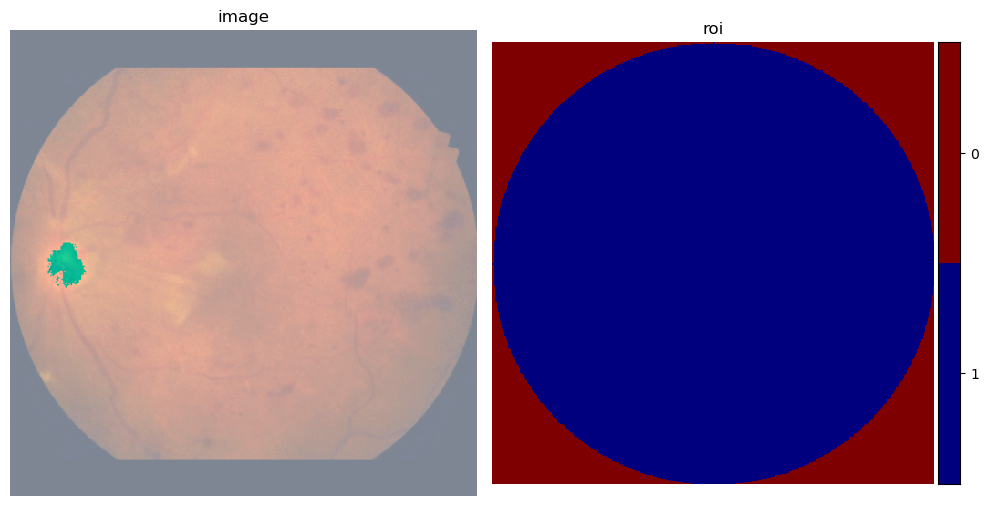

In [46]:
from nntools.dataset import nntools_wrapper

all_datamodule = merge_existing_datamodules(list(datamodules.values()))


@nntools_wrapper
def brightness(image):
    print("Called")
    return {"image": image + 127}


all_datamodule.set_data_pipeline_hook(brightness, position=DataHookPosition.PRE_RESIZE)

all_datamodule.test[0].plot(0)

In [49]:
all_datamodule.test[0].composer.ops

[{'f': <function fundus_data_toolkit.utils.image_processing.fundus_precise_autocrop(image: numpy.ndarray, mask=None)>,
  'active': True},
 {'f': 0_<function brightness at 0x771444b0bce0> STATUS: Active ,
  'active': True},
 {'f': Compose([
    LongestMaxSize(always_apply=True, p=1.0, max_size=[512, 512], interpolation=1),
    PadIfNeeded(always_apply=True, p=1.0, min_height=512, min_width=512, pad_height_divisor=None, pad_width_divisor=None, position=PositionType.CENTER, border_mode=0, value=0.0, mask_value=None),
  ], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={'roi': 'mask'}, is_check_shapes=True),
  'active': True},
 {'f': , 'active': True},
 {'f': <nntools.dataset.composer.CacheBullet at 0x771444ae84a0>,
  'active': True},
 {'f': , 'active': True},
 {'f': <function fundus_data_toolkit.utils.image_processing.image_check(image: numpy.ndarray)>,
  'active': True},
 {'f': Compose([
    Normalize(always_apply=True, p=1.0, mean=(0.485, 0.456, 0.406), std=(0.229, 0.

In [48]:
from time import sleep

import numpy as np
from tqdm.notebook import tqdm

dataset = idrid_datamodule.train
dataloader = idrid_datamodule.train_dataloader()
for i in tqdm(enumerate(np.arange(25))):
    pass

0it [00:00, ?it/s]